<a href="https://colab.research.google.com/github/Bast-aleja/Aplicacionesanalitica/blob/main/Tercer_trabajo_Analitica_Hospitalizacionesfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##importar paquetes
import pandas as pd
import numpy as np
import random

In [ ]:
#importar datos 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# cargar bases
cronicos= pd.read_csv('/content/drive/MyDrive/analiticatres/RETO_df_cronicos.csv', sep=",")
egresos= pd.read_csv('/content/drive/MyDrive/analiticatres/RETO_df_egresos.csv', sep=",")
usuarios= pd.read_csv('/content/drive/MyDrive/analiticatres/RETO_df_usuarios.csv', sep=",")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (34,36,39,40,50,52,55,56,58,62,64,65,66,75,107,108,111,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Colu

In [ ]:
cronicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38736 entries, 0 to 38735
Columns: 290 entries, YEAR to NombreDiagnostico83
dtypes: float64(39), int64(10), object(241)
memory usage: 85.7+ MB


In [ ]:
egresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6376 entries, 0 to 6375
Data columns (total 66 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   YEAR                               6376 non-null   int64  
 1   MES                                6376 non-null   object 
 2   NRO ATENCION                       6376 non-null   int64  
 3   NRO INGRESO                        6376 non-null   int64  
 4   SERVICIO HABILITADO COD            6376 non-null   float64
 5   SERVICIO HABILITADO                6376 non-null   object 
 6   TIPO IDENTIFICACION                6376 non-null   object 
 7   NRODOC                             6376 non-null   int64  
 8   FECHA NACIMIENTO                   6376 non-null   object 
 9   REGIMEN AFILIACION                 6376 non-null   object 
 10  EPS VALIDADA                       4103 non-null   object 
 11  MODALIDAD CONTRATO                 6376 non-null   objec

In [ ]:
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183911 entries, 0 to 183910
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   MES                            183911 non-null  object 
 1   YEAR                           183911 non-null  int64  
 2   NRODOC                         183911 non-null  int64  
 3   SEXO                           183901 non-null  object 
 4   FECHA NACIMIENTO               111831 non-null  object 
 5   EDAD                           149755 non-null  float64
 6   DEPARTAMENTO                   82284 non-null   object 
 7   MUNICIPIO                      81397 non-null   object 
 8   BARRIO                         115344 non-null  object 
 9   FECHA INICIO AL PGP            125658 non-null  object 
 10  FECHA PRIMERA CLASE FUNCIONAL  87961 non-null   object 
 11  PRIMERA CLASE FUNCIONAL        89641 non-null   object 
 12  FECHA ÚLTIMA CLASE FUNCIONAL  

In [ ]:
#se separan las bases de datos según los años antes y despues de la pandemia
cronicospos = cronicos[(cronicos['YEAR']> 2018)]
cronicospre = cronicos[(cronicos['YEAR']<= 2018)]
egresospos=egresos[(egresos['YEAR']> 2018)]
egresospre=egresos[(egresos['YEAR']<= 2018)]
usuariospos=usuarios[(usuarios['YEAR']> 2018)]
usuariospre=usuarios[(usuarios['YEAR']<= 2018)]

**TRATAMIENTO DE BASES DESPUÉS DE PANDEMIA**

BASE CRONICOSPOS

In [ ]:
cronicospos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25909 entries, 12827 to 38735
Columns: 290 entries, YEAR to NombreDiagnostico83
dtypes: float64(39), int64(10), object(241)
memory usage: 57.5+ MB


In [ ]:
cronicospos.columns

Index(['YEAR', 'MES', 'Fecha diligenciamiento', 'Hora', 'Atención', 'Ingreso',
       'Tipo', 'NRODOC', 'Peso', 'Talla',
       ...
       'Diagnostico79', 'NombreDiagnostico79', 'Diagnostico80',
       'NombreDiagnostico80', 'Diagnostico81', 'NombreDiagnostico81',
       'Diagnostico82', 'NombreDiagnostico82', 'Diagnostico83',
       'NombreDiagnostico83'],
      dtype='object', length=290)

In [ ]:
#Se pasan todas las columnas a minusculas para ser tratadas más facil
cronicospos.columns = cronicospos.columns.str.lower()

In [ ]:
#Porcentaje de representación de datos nulos en la base cronicospos
print(round(cronicospos.isnull().sum().sum()/cronicospos.size, 2)*100, "%")

68.0 %


In [ ]:
#Se evalua el porcentaje de nulos por columna
((cronicospos.isnull().sum() / len(cronicospos))*100).sort_values(ascending = False)

otras morbilidades                        100.0
espirometria                              100.0
gravedad                                  100.0
diagnóstico epoc                          100.0
clasificación                             100.0
                                          ...  
tiempo en segundos (recorrer 5 metros)      0.0
velocidad (m/s)                             0.0
calificación velocidad                      0.0
ambito según el médico                      0.0
year                                        0.0
Length: 290, dtype: float64

In [ ]:
#Se eliminan aquellas columnas en las que el porcentaje de nulos sea mayor al 60%
lista=cronicospos.columns

In [ ]:
for i in lista:
  if (cronicospos[i].isnull().sum() / len(cronicospos))*100> 60 :
    cronicospos=cronicospos.drop([i], axis=1)


In [ ]:
#La base queda con 97 columnas de 290
cronicospos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25909 entries, 12827 to 38735
Data columns (total 97 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   year                                       25909 non-null  int64  
 1   mes                                        25909 non-null  object 
 2   fecha diligenciamiento                     25909 non-null  object 
 3   hora                                       25909 non-null  object 
 4   atención                                   25909 non-null  int64  
 5   ingreso                                    25909 non-null  int64  
 6   tipo                                       25909 non-null  object 
 7   nrodoc                                     25909 non-null  int64  
 8   peso                                       25909 non-null  float64
 9   talla                                      25909 non-null  float64
 10  imc               

In [ ]:
#Variables sin nulos
lista=cronicospos.columns
cont=0
for i in lista:
  if cronicospos[i].isnull().sum()<=0:
    print(i)
    ("--------------------------------------")


year
mes
fecha diligenciamiento
hora
atención
ingreso
tipo
nrodoc
peso
talla
imc
clasificación imc
perímetro muslo
perímetro cintura
pliegue triceps
pliegue abdomen
pliegue muslo
sumatoria pliegues
presión arterial sistólica
presión arterial diastólica
frecuencia cardíaca en reposo
auto-calificacion nivel de ejercicio
constantes
mets -índice metabólico
vo2 - máxima cantidad de oxígeno
calificación (índice de fragilidad)
tiempo en segundos (apoyo monopodal)
calificación (apoyo monopodal)
tiempo en segundos (recorrer 5 metros)
velocidad (m/s)
calificación velocidad
ambito según el médico


In [ ]:
#Se eliminan aquellas que no aportan al modelo o que otra columna contenga el mismo dato pero en un tipo diferente
lista= (['fecha diligenciamiento', 'hora', 'atención', 'ingreso', 'tipo', 'imc', 'perímetro muslo', 'perímetro cintura',
       'pliegue triceps', 'pliegue abdomen', 'pliegue muslo', 'constantes', 'tiempo en segundos (apoyo monopodal)', 'tiempo en segundos (recorrer 5 metros)', 'velocidad (m/s)' ])

In [ ]:
for i in lista:
  cronicospos=cronicospos.drop([i], axis=1)

In [ ]:
#Variables con nulos
lista=cronicospos.columns
cont=0
for i in lista:
  if cronicospos[i].isnull().sum()>0:
    print(i)
    cont=cont+1
    ("--------------------------------------")
print(cont)

saturación de oxígeno (%)
índice de fragilidad groningen
test findrisc
índice tobillo/brazo
observaciones
presión arterial registro medico
diabetes mellitus
tipo diabetes mellitus
tiempo con el diagnóstico
glicemia
fecha glicemia
hemoglobina glicada
fecha hemoglobina glicosilada
control diabetes
tiene hta
control hta
tiene riesgo de tener hta
tiempo con el diagnóstico1
tiene epoc
enfermedad coronaria (en el último año)
insuficiencia cardíaca
valvulopatía
arritmia o paciente con dispositivo
sufre de alguna enfermedad cardiovascular
¿cuál?
tabaquismo
cuantos cigarrillos día
años de consumo
lipoproteina
fecha ldl
hdl
fecha hdl
colesterol total
fecha colesterol total
trigliceridos
fecha trigliceridos
clasificación de framinghan
creatinina 1 consulta
fecha creatinina1
tasa de filtración glomerular tfg
estadio de la enfermedad renal
microalbuminuria
fecha microalbuminuria
hormona estimulante de la tiroides (tsh)
clase funcional
creatinina 2 consulta
fecha creatinina2
tasa de filtración glome

In [ ]:
# Se dividen estas variables con nulos en 3 grupos, las que no aportan al modelo, las que su cantidad de nulos es dificil de reemplazar, aquellas que pueden hacer parte del modelo
# Se evalua cada columna
cronicospos.columns


Index(['year', 'mes', 'nrodoc', 'peso', 'talla', 'clasificación imc',
       'saturación de oxígeno (%)', 'sumatoria pliegues',
       'presión arterial sistólica', 'presión arterial diastólica',
       'frecuencia cardíaca en reposo', 'auto-calificacion nivel de ejercicio',
       'mets -índice metabólico', 'vo2 - máxima cantidad de oxígeno',
       'índice de fragilidad groningen', 'calificación (índice de fragilidad)',
       'calificación (apoyo monopodal)', 'calificación velocidad',
       'test findrisc', 'índice tobillo/brazo', 'observaciones',
       'presión arterial registro medico', 'diabetes mellitus',
       'tipo diabetes mellitus', 'tiempo con el diagnóstico', 'glicemia',
       'fecha glicemia', 'hemoglobina glicada',
       'fecha hemoglobina glicosilada', 'control diabetes', 'tiene hta',
       'control hta', 'tiene riesgo de tener hta',
       'tiempo con el diagnóstico1', 'tiene epoc',
       'enfermedad coronaria (en el último año)', 'insuficiencia cardíaca',
     

In [ ]:
#revisiòn de variables
cronicospos['tiene próximo control'].unique()

array(['Si', nan, 'No'], dtype=object)

In [ ]:
#se borran las columnas que no tengan valor agregado o que otra columna contenga el mismo dato pero en un tipo diferente
listacr= ([ 'índice de fragilidad groningen', 'fecha glicemia', 'tiempo con el diagnóstico1', 'fecha hemoglobina glicosilada', 'tipo control',
       'cuantos cigarrillos día', 'estadio de la enfermedad renal', 'creatinina 2 consulta', 'tiene riesgo de tener hta', 
       'tasa de filtración glomerular tfg', 'meses de diferencia entre tfg', 'cambio de tfg', 'análisis y conducta a seguir'])

In [ ]:
for i in listacr:
  cronicospos=cronicospos.drop([i], axis=1)

In [ ]:
#se borran las columnas que es dificil de reemplazar sus nulos por la cantidad o el tipo de dato que tienen
lista2=cronicospos.columns

In [ ]:
#se revisa cada variable
for i in lista2:
  print(i)
  print(cronicospos[i].isnull().sum())
  print('------------------------------------------------')

year
0
------------------------------------------------
mes
0
------------------------------------------------
nrodoc
0
------------------------------------------------
peso
0
------------------------------------------------
talla
0
------------------------------------------------
clasificación imc
0
------------------------------------------------
saturación de oxígeno (%)
117
------------------------------------------------
sumatoria pliegues
0
------------------------------------------------
presión arterial sistólica
0
------------------------------------------------
presión arterial diastólica
0
------------------------------------------------
frecuencia cardíaca en reposo
0
------------------------------------------------
auto-calificacion nivel de ejercicio
0
------------------------------------------------
mets -índice metabólico
0
------------------------------------------------
vo2 - máxima cantidad de oxígeno
0
------------------------------------------------
calificación (í

In [ ]:
#revisión
cronicospos['diagnostico1'].unique()

array([nan, 'N390', 'I671', 'I10X', 'R522', 'Z933', 'I255', 'E106',
       'G20X', 'N189', 'M170', 'F319', 'R520', 'I698', 'E039', 'M800',
       'J449', 'L892', 'I500', 'E119', 'K590', 'N319', 'K295', 'M809',
       'E059', 'K291', 'K703', 'Z921', 'N183', 'I872', 'G825', 'N182',
       'G809', 'M819', 'R32X', 'N40X', 'M060', 'J440', 'M150', 'U072',
       'M500', 'J441', 'I509', 'I694', 'R53X', 'R104', 'F412', 'G408',
       'G309', 'F510', 'N185', 'J459', 'G409', 'I499', 'T652', 'R568',
       'M810', 'N422', 'E784', 'I519', 'I845', 'F700', 'G470', 'I489',
       'N184', 'E785', 'H103', 'R51X', 'F314', 'G632', 'Y841', 'F317',
       'I771', 'F018', 'I250', 'F21X', 'F418', 'K746', 'M159', 'A630',
       'M45X', 'F413', 'K296', 'H902', 'I490', 'Z111', 'G459', 'I482',
       'Z822', 'N418', 'M545', 'Z123', 'E782', 'Z720', 'M179', 'R54X',
       'E108', 'F311', 'M751', 'I828', 'Z950', 'R521', 'J304', 'G700',
       'F411', 'H259', 'F721', 'M792', 'I219', 'I209', 'N484', 'Z954',
       'I

In [ ]:
listaf= (['test findrisc','índice tobillo/brazo', 'observaciones', 'presión arterial registro medico', 'tipo diabetes mellitus','tiempo con el diagnóstico',
'¿cuál?', 'fecha ldl', 'fecha colesterol total', 'fecha trigliceridos', 'fecha creatinina1', 'fecha microalbuminuria',
'fecha creatinina2', 'basciloscopia', 'úlcera de pie diabético', 'fecha próximo control', 'diagnostico1', 'nombrediagnostico1', 'diagnostico2',
 'nombrediagnostico2', 'diagnostico3', 'nombrediagnostico3', 'fecha hdl'])

In [ ]:
for i in listaf:
  cronicospos=cronicospos.drop([i], axis=1)

Al hacer la revisión de cada columna se nota que la mayoria tienen 504 nulos, por lo que se obtara por borrar esas filas y no las columnas debido a que estas no estan aportando al modelo pues todas sus columnas tienen Nulos

In [ ]:
#Se reemplazan los nulos y luego se borran las columnas 
cronicospos['tiene próximo control']=cronicospos['tiene próximo control'].fillna(0)

In [ ]:
cronicospos = cronicospos.drop(cronicospos[cronicospos['tiene próximo control']==0].index)
cronicospos.isnull().sum()

year                                           0
mes                                            0
nrodoc                                         0
peso                                           0
talla                                          0
clasificación imc                              0
saturación de oxígeno (%)                    113
sumatoria pliegues                             0
presión arterial sistólica                     0
presión arterial diastólica                    0
frecuencia cardíaca en reposo                  0
auto-calificacion nivel de ejercicio           0
mets -índice metabólico                        0
vo2 - máxima cantidad de oxígeno               0
calificación (índice de fragilidad)            0
calificación (apoyo monopodal)                 0
calificación velocidad                         0
diabetes mellitus                              0
glicemia                                       0
hemoglobina glicada                            0
control diabetes    

In [ ]:
#debido al tipo de dato que representa la saturación de oxigeno de la persona, se decide eliminar esta columna pues sus nulos no pueden ser reemplazados
cronicospos=cronicospos.drop(['saturación de oxígeno (%)'], axis=1)

In [ ]:
#Se miran si existen varios diagnosticos para una persona
df=pd.DataFrame()
df['numero_de_diagnosticos']= cronicospos['nrodoc'].value_counts()
df['nrodoc']= cronicospos['nrodoc'].value_counts().index
df=df.reset_index().drop('index', axis=1)
df

,numero_de_diagnosticos,nrodoc
0,17,312214
1,16,311465
2,15,308752
3,15,308578
4,15,313574
...,...,...
5014,1,313530
5015,1,313637
5016,1,312525
5017,1,308288


In [ ]:
#Se eliminan los diagnosticos más antiguos y se deja el más reciente unicamente
def funcion_1(base):
  dft = base.copy(deep=True)
  lista= list(df['nrodoc'])
  len(lista)
  dft2=pd.DataFrame()
  for i in lista:
    dft3=dft[dft['nrodoc']==i].reset_index()
    if dft3.shape[0] > 1 :
      for j in range(0, dft3.shape[0] -1):
        dft3.drop(j, axis=0, inplace= True)
      dft2= dft2.append(dft3, ignore_index=True)
    else:
      dft2=dft2.append(dft3, ignore_index=True)
  return dft2

In [ ]:
cronicosposf= funcion_1(cronicospos)

In [ ]:
#Se rectifica que haya quedado una columna por id
df=pd.DataFrame()
df['numero_de_diagnosticos']= cronicosposf['nrodoc'].value_counts()
df['nrodoc']= cronicosposf['nrodoc'].value_counts().index
df=df.reset_index().drop('index', axis=1)
df

,numero_de_diagnosticos,nrodoc
0,1,312214
1,1,313888
2,1,313732
3,1,310810
4,1,311170
...,...,...
5014,1,307159
5015,1,312147
5016,1,310672
5017,1,308168


In [ ]:
cronicosposf.head(2)

,index,year,mes,nrodoc,peso,talla,clasificación imc,sumatoria pliegues,presión arterial sistólica,presión arterial diastólica,...,creatinina 1 consulta,microalbuminuria,hormona estimulante de la tiroides (tsh),clase funcional,tasa de filtración glomerular tfg2,remisión,diagnóstico principal,tiene próximo control,requiere cita de morbilidad,ambito según el médico
0,37327,2022,MAYO,312214,39.0,155.0,Bajo,15.0,80,60,...,0.57,0.43,1.84,Clase funcional 3,118.24,Grupal 4,R104 - OTROS DOLORES ABDOMINALES Y LOS NO ESPE...,Si,No,Domiciliario
1,36974,2022,MAYO,311465,54.0,155.0,Normal,32.0,95,55,...,0.79,0.00,2.41,Clase funcional 4,0.00,Grupal 4,F009 - DEMENCIA EN LA ENFERMEDAD DE ALZHEIMER ...,Si,No,Domiciliario


In [ ]:
#se elimina columna adicional
cronicosposf=cronicosposf.drop(['index'], axis=1)

In [ ]:
#Se pone los datos en un mejor tipo
#cronicosposf.convert_dtypes().dtypes
cronicosposf = cronicosposf.convert_dtypes()

In [ ]:
#Se eliminan las columnas que tengan muchos datos string unicos debido a que son dificiles de tratar para modelos de regresión
lista=cronicosposf.columns

In [ ]:
for i in lista:
  print(i)
  print(cronicosposf[i].unique())
  ('----------------------------------------')

year
<IntegerArray>
[2022, 2021]
Length: 2, dtype: Int64
mes
<StringArray>
[      'MAYO',      'ABRIL',    'FEBRERO',      'MARZO',      'ENERO',
  'NOVIEMBRE',  'DICIEMBRE',    'OCTUBRE', 'SEPTIEMBRE',     'AGOSTO',
      'JULIO',      'JUNIO']
Length: 12, dtype: string
nrodoc
<IntegerArray>
[312214, 311465, 308752, 308578, 313574, 312459, 311318, 312746, 310618,
 310984,
 ...
 313780, 309120, 306776, 306387, 308765, 313530, 313637, 312525, 308288,
 314135]
Length: 5019, dtype: Int64
peso
<FloatingArray>
[ 39.0,  54.0,  84.0,  55.0,  68.0, 100.0,  63.0,  60.0,  70.0,  58.0,
 ...
  69.7,  98.5,  75.3,  58.4,  91.3,  36.2,  39.5,  41.5,  58.2, 127.0]
Length: 230, dtype: Float64
talla
<IntegerArray>
[155, 170, 168, 160, 165, 163, 161, 154, 171, 150, 158, 140, 156, 157, 149,
 176, 143, 153, 151, 159, 130, 162, 147, 146, 167, 152, 172, 164, 110, 142,
 148, 145, 169, 175, 125, 136, 180, 144, 183, 178, 166, 173, 132, 135, 127,
 179, 141, 174, 128, 134, 133, 181, 185, 100, 139, 138, 184, 120,

EGRESOSPOS

In [ ]:
egresospos.columns

Index(['YEAR', 'MES', 'NRO ATENCION', 'NRO INGRESO', 'SERVICIO HABILITADO COD',
       'SERVICIO HABILITADO', 'TIPO IDENTIFICACION', 'NRODOC',
       'FECHA NACIMIENTO', 'REGIMEN AFILIACION', 'EPS VALIDADA',
       'MODALIDAD CONTRATO', 'FUENTE FINANCIACION1', 'FUENTE FINANCIACION2',
       'SERVICIO ADMITE', 'BLOQUE ANTERIOR', 'PISO ANTERIOR',
       'SERVICIO ANTERIOR', 'NRO CAMA ANTERIOR', 'VIA INGRESO', 'BLOQUE',
       'UNIDAD ESTRATEGICA', 'PISO', 'NRO CAMA', 'SERVICIO EGRESO',
       'TIPO EGRESO', 'FECHA INGRESO CLINICA', 'FECHA INGRESO SERVICIO',
       'FECHA POSIBLE ALTA', 'FECHA ALTA MEDICA', 'FECHA RECAUDO',
       'FECHA CAMILLERO', 'FECHA ENFERMERIA', 'FECHA FACTURACION AUDIFARMA',
       'FECHA FARMACIA', 'FECHA SALIDA', 'FECHA ASEO',
       'DEMORA ASIGNACION CAMA', 'DEMORA APLICACION MEDICAMENTO',
       'DEMORA SALIDA CLINICA (DIAS)', 'TRANSFUSION SANGRE', 'ANTIBIOTICO',
       'ALTA MEDICA', 'POSIBLE ALTA', 'DXPRINCIPAL EGRESO COD',
       'DXPRINCIPAL EGRESO', 'DX 

In [ ]:
egresospos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1601 entries, 11 to 6375
Data columns (total 66 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   YEAR                               1601 non-null   int64  
 1   MES                                1601 non-null   object 
 2   NRO ATENCION                       1601 non-null   int64  
 3   NRO INGRESO                        1601 non-null   int64  
 4   SERVICIO HABILITADO COD            1601 non-null   float64
 5   SERVICIO HABILITADO                1601 non-null   object 
 6   TIPO IDENTIFICACION                1601 non-null   object 
 7   NRODOC                             1601 non-null   int64  
 8   FECHA NACIMIENTO                   1601 non-null   object 
 9   REGIMEN AFILIACION                 1601 non-null   object 
 10  EPS VALIDADA                       1601 non-null   object 
 11  MODALIDAD CONTRATO                 1601 non-null   obje

In [ ]:
#Porcentaje de representación de datos nulos en la base egresospos
print(round(egresospos.isnull().sum().sum()/egresospos.size, 2)*100, "%")

7.000000000000001 %


In [ ]:
#Se evalua el porcentaje de nulos por columna
((egresospos.isnull().sum() / len(egresospos))*100).sort_values(ascending = False)

FECHA POSIBLE ALTA              92.941911
CAUSA BASICA CAPITULO COD       87.008120
CAUSA BASICA CATEGORIA COD      87.008120
CAUSA BASICA MUERTE COD         87.008120
PERTINENCIA DIAGNOSTICA         67.020612
                                  ...    
TIPO EGRESO                      0.000000
FECHA INGRESO CLINICA            0.000000
FECHA INGRESO SERVICIO           0.000000
FECHA ALTA MEDICA                0.000000
PROFESIONAL ESPECIALIDAD GRD     0.000000
Length: 66, dtype: float64

In [ ]:
#se eliminan aquellas columnas que tengan más de 60% de sus datos nulos
lista=egresospos.columns

In [ ]:
for i in lista:
  if (egresospos[i].isnull().sum() / len(egresospos))*100> 60 :
    egresospos=egresospos.drop([i], axis=1)


In [ ]:
#Variables con nulos
lista=egresospos.columns
cont=0
for i in lista:
  if egresospos[i].isnull().sum()>0:
    print(i)
    ("--------------------------------------")

FECHA RECAUDO
FECHA CAMILLERO
FECHA ENFERMERIA
FECHA FACTURACION AUDIFARMA
FECHA FARMACIA
FECHA ASEO
DX RELACIONADO1 COD
DX RELACIONADO2 COD
DX RELACIONADO3 COD
DX PRINCIPAL EGRESO CATEGORIA COD
DX PRINCIPAL EGRESO CAPITULO COD


In [ ]:
#validación de valor agregado de los datos
egresospos['CAUSA BASICA MUERTE'].unique()

array(['Sin informacion en base de datos', 'FISTULA DEL INTESTINO',
       'COVID-19 VIRUS IDENTIFICADO', 'COLANGITIS',
       'CALCULO DE LA VESICULA BILIAR CON COLECISTITIS AGUDA ',
       'CARCINOMA DE CELULAS HEPATICAS',
       'INFARTO AGUDO DEL MIOCARDIO  SIN OTRA ESPECIFICACION ',
       'ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON INFECCION AGUDA DE LAS VIAS RESPIRATORIAS INFERIORES',
       'ENFERMEDAD CARDIACA HIPERTENSIVA CON INSUFICIENCIA CARDIACA (CONGESTIVA) ',
       'DIABETES MELLITUS NO INSULINODEPENDIENTE  CON COMPLICACIONES MULTIPLES ',
       'ENFERMEDAD CARDIORRENAL HIPERTENSIVA CON INSUFICIENCIA CARDIACA Y RENAL (CONGESTIVAS) ',
       'OTRAS HEMORRAGIAS INTRAENCEFALICAS ',
       'INFLUENZA CON NEUMONIA  DEBIDA A VIRUS DE LA INFLUENZA IDENTIFICADO',
       'TUMOR MALIGNO DEL ENDOMETRIO ',
       'SECUELAS DE ENFERMEDAD CEREBROVASCULAR  NO ESPECIFICADA COMO HEMORRAGICA U OCLUSIVA ',
       'TUMOR MALIGNO DE LA MAMA  PARTE NO ESPECIFICADA',
       'OTRAS CIRROSIS D

In [ ]:
lista = (['FECHA RECAUDO', 'FECHA CAMILLERO', 'FECHA ENFERMERIA', 'FECHA FACTURACION AUDIFARMA', 'FECHA FARMACIA', 'FECHA ASEO',
'DX RELACIONADO1 COD', 'DX RELACIONADO2 COD', 'DX RELACIONADO3 COD', 'DX PRINCIPAL EGRESO CATEGORIA COD', 'DX PRINCIPAL EGRESO CAPITULO COD'])

In [ ]:
for i in lista:

  egresospos=egresospos.drop([i], axis=1)

In [ ]:
egresospos.isnull().sum()

YEAR                             0
MES                              0
NRO ATENCION                     0
NRO INGRESO                      0
SERVICIO HABILITADO COD          0
SERVICIO HABILITADO              0
TIPO IDENTIFICACION              0
NRODOC                           0
FECHA NACIMIENTO                 0
REGIMEN AFILIACION               0
EPS VALIDADA                     0
MODALIDAD CONTRATO               0
FUENTE FINANCIACION1             0
FUENTE FINANCIACION2             0
SERVICIO ADMITE                  0
BLOQUE ANTERIOR                  0
PISO ANTERIOR                    0
SERVICIO ANTERIOR                0
NRO CAMA ANTERIOR                0
VIA INGRESO                      0
BLOQUE                           0
UNIDAD ESTRATEGICA               0
PISO                             0
NRO CAMA                         0
SERVICIO EGRESO                  0
TIPO EGRESO                      0
FECHA INGRESO CLINICA            0
FECHA INGRESO SERVICIO           0
FECHA ALTA MEDICA   

In [ ]:
#Se eliminan aquellos que no agregan valor
lista =(['NRO ATENCION', 'NRO INGRESO', 'SERVICIO HABILITADO COD',
       'SERVICIO HABILITADO', 'TIPO IDENTIFICACION','FECHA NACIMIENTO','REGIMEN AFILIACION', 'MODALIDAD CONTRATO', 'FUENTE FINANCIACION1', 'FUENTE FINANCIACION2',
       'SERVICIO ANTERIOR', 'NRO CAMA ANTERIOR', 'VIA INGRESO', 'BLOQUE','UNIDAD ESTRATEGICA', 'PISO', 'NRO CAMA', 'SERVICIO EGRESO', 'FECHA INGRESO SERVICIO',
       'FECHA ALTA MEDICA',  'FECHA SALIDA','DEMORA ASIGNACION CAMA', 'DEMORA APLICACION MEDICAMENTO', 'TRANSFUSION SANGRE', 'ANTIBIOTICO','ALTA MEDICA', 'POSIBLE ALTA', 'DXPRINCIPAL EGRESO COD',
       'DXPRINCIPAL EGRESO', 'DX RELACIONADO1', 'DX RELACIONADO2', 'TIPO DIAGNOSTICO PRINCIPAL',
       'DX PRINCIPAL EGRESO CATEGORIA', 'DX PRINCIPAL EGRESO CAPITULO',
       'CAUSA BASICA CATEGORIA',
       'CAUSA BASICA CAPITULO','DEMORA SALIDA CLINICA (DIAS)', 'YEAR', 'MES', 'BLOQUE ANTERIOR', 'PISO ANTERIOR', 'PROFESIONAL ESPECIALIDAD', 'FECHA INGRESO CLINICA'])

In [ ]:
for i in lista:
  egresospos=egresospos.drop([i], axis=1)

In [ ]:
#se ponen todas las columnas en minusculas
egresospos.columns = egresospos.columns.str.lower()

In [ ]:
df=pd.DataFrame()
df['numero_de_hospitalizaciones']= egresospos['nrodoc'].value_counts()
df['nrodoc']= egresospos['nrodoc'].value_counts().index
df=df.reset_index().drop('index', axis=1)
df

,numero_de_hospitalizaciones,nrodoc
0,10,313240
1,7,312214
2,6,311890
3,6,312704
4,6,306827
...,...,...
1124,1,313418
1125,1,312815
1126,1,311775
1127,1,312803


In [ ]:
egresosposf= funcion_1(egresospos)

In [ ]:
egresosposf

,index,nrodoc,eps validada,servicio admite,tipo egreso,dx relacionado3,causa basica muerte,profesional especialidad grd
0,2996,313240,NUEVA EPS S.A. PGP,Hospitalización,Alta Médica,TRASTORNO DE LOS TEJIDOS BLANDOS NO ESPECIFIC...,Sin informacion en base de datos,Cirugia General
1,5208,312214,NUEVA EPS S.A. PGP,Urgencias Generales Sótano,Alta Médica,BLASTOMICOSIS NO ESPECIFICADA,Sin informacion en base de datos,Medicina Interna
2,1567,311890,NUEVA EPS S.A. PGP,Urgencias Generales Sótano,Alta Médica,HEMATEMESIS,Sin informacion en base de datos,Cirugia General
3,1479,312704,NUEVA EPS S.A. PGP,Urgencias Generales Sótano,Alta Médica,OBESIDAD NO ESPECIFICADA,Sin informacion en base de datos,Medicina Interna
4,3685,306827,NUEVA EPS S.A. PGP,Urgencias Generales Sótano,Alta Médica,Otras gastroenteritis y colitis de origen infe...,Sin informacion en base de datos,Medicina Interna
...,...,...,...,...,...,...,...,...
1124,2974,313418,NUEVA EPS S.A. PGP,Urgencias Generales Sótano,Alta Médica,DIABETES MELLITUS NO INSULINODEPENDIENTE SIN ...,Sin informacion en base de datos,Medicina Interna
1125,2976,312815,NUEVA EPS S.A. PGP,Hospitalización,Alta Médica,OTROS TRASTORNOS DEL ALMACENAMIENTO DE LIPIDOS,Sin informacion en base de datos,Medicina Interna
1126,2978,311775,NUEVA EPS S.A. PGP,Urgencias Generales Sótano,Alta Médica,OTROS TRASTORNOS DEL EQUILIBRIO DE LOS ELECTRO...,Sin informacion en base de datos,Medicina Interna
1127,2979,312803,NUEVA EPS S.A. PGP,Cirugía,Alta Médica,MIALGIA,Sin informacion en base de datos,Ortopedia


In [ ]:
#se une la base de datos egresosposf y el numero de hospitalizaciones
egresosposf1=pd.merge(df, egresosposf, on='nrodoc', how='left')

In [ ]:
egresosposf1

,numero_de_hospitalizaciones,nrodoc,index,eps validada,servicio admite,tipo egreso,dx relacionado3,causa basica muerte,profesional especialidad grd
0,10,313240,2996,NUEVA EPS S.A. PGP,Hospitalización,Alta Médica,TRASTORNO DE LOS TEJIDOS BLANDOS NO ESPECIFIC...,Sin informacion en base de datos,Cirugia General
1,7,312214,5208,NUEVA EPS S.A. PGP,Urgencias Generales Sótano,Alta Médica,BLASTOMICOSIS NO ESPECIFICADA,Sin informacion en base de datos,Medicina Interna
2,6,311890,1567,NUEVA EPS S.A. PGP,Urgencias Generales Sótano,Alta Médica,HEMATEMESIS,Sin informacion en base de datos,Cirugia General
3,6,312704,1479,NUEVA EPS S.A. PGP,Urgencias Generales Sótano,Alta Médica,OBESIDAD NO ESPECIFICADA,Sin informacion en base de datos,Medicina Interna
4,6,306827,3685,NUEVA EPS S.A. PGP,Urgencias Generales Sótano,Alta Médica,Otras gastroenteritis y colitis de origen infe...,Sin informacion en base de datos,Medicina Interna
...,...,...,...,...,...,...,...,...,...
1124,1,313418,2974,NUEVA EPS S.A. PGP,Urgencias Generales Sótano,Alta Médica,DIABETES MELLITUS NO INSULINODEPENDIENTE SIN ...,Sin informacion en base de datos,Medicina Interna
1125,1,312815,2976,NUEVA EPS S.A. PGP,Hospitalización,Alta Médica,OTROS TRASTORNOS DEL ALMACENAMIENTO DE LIPIDOS,Sin informacion en base de datos,Medicina Interna
1126,1,311775,2978,NUEVA EPS S.A. PGP,Urgencias Generales Sótano,Alta Médica,OTROS TRASTORNOS DEL EQUILIBRIO DE LOS ELECTRO...,Sin informacion en base de datos,Medicina Interna
1127,1,312803,2979,NUEVA EPS S.A. PGP,Cirugía,Alta Médica,MIALGIA,Sin informacion en base de datos,Ortopedia


In [ ]:
#Se elimina fila extra
egresosposf1=egresosposf1.drop(['index'], axis=1)

In [ ]:
#Se arregla el tipo de datos (#aqui se cambia el tipo de dato pero no se guarda el cambio solo lo muestra)
#egresosposf1.convert_dtypes().dtypes
egresosposf1 =  egresosposf1.convert_dtypes()

In [ ]:
egresosposf1.columns

Index(['numero_de_hospitalizaciones', 'nrodoc', 'eps validada',
       'servicio admite', 'tipo egreso', 'dx relacionado3',
       'causa basica muerte', 'profesional especialidad grd'],
      dtype='object')

In [ ]:
#Se mira que cada columna tenga sus datos escritos correctamente
listae=(['eps validada', 'servicio admite',
       'tipo egreso', 'dx relacionado3', 'causa basica muerte',
       'profesional especialidad grd'])

In [ ]:
for i in listae:
    print(i)
    print(egresosposf1[i].unique())
    ('----------------------------------------------')

eps validada
<StringArray>
[                'NUEVA EPS S.A. PGP',                     'NUEVA EPS S.A.',
          'AXA SEGUROS COLPATRIA S.A', 'SEGUROS GENERALES SURAMERICANA S.A']
Length: 4, dtype: string
servicio admite
<StringArray>
[                 'Hospitalización',       'Urgencias Generales Sótano',
       'Urgencias Generales Piso 1', 'Sin informacion en Base de datos',
                          'Cirugía',             'Ambulatoria Personal',
               'Urgencias Maternas']
Length: 7, dtype: string
tipo egreso
<StringArray>
['Alta Médica', 'Fallece', 'Remisión a otra institución', 'Alta Voluntaria']
Length: 4, dtype: string
dx relacionado3
<StringArray>
[                  'TRASTORNO DE LOS TEJIDOS BLANDOS  NO ESPECIFICADO ',
                                       'BLASTOMICOSIS  NO ESPECIFICADA',
                                                         'HEMATEMESIS ',
                                            'OBESIDAD  NO ESPECIFICADA',
                 'Otras gastroent

In [ ]:
#base de datos final
egresosposf1=egresosposf1.copy(deep = True)

Depuración base de datos usuariospos

In [ ]:
usuariospos.columns

Index(['MES', 'YEAR', 'NRODOC', 'SEXO', 'FECHA NACIMIENTO', 'EDAD',
       'DEPARTAMENTO', 'MUNICIPIO', 'BARRIO', 'FECHA INICIO AL PGP',
       'FECHA PRIMERA CLASE FUNCIONAL', 'PRIMERA CLASE FUNCIONAL',
       'FECHA ÚLTIMA CLASE FUNCIONAL', 'ÚLTIMA CLASE FUNCIONAL', 'CICLO_VITAL',
       'QUINQUENIO'],
      dtype='object')

In [ ]:
#se mira el porcentaje de nulos
print(round(usuariospos.isnull().sum().sum()/usuariospos.size, 2)*100, "%")

3.0 %


In [ ]:
#se eliminan aquellas columnas que tengan más de 60% de sus datos nulos
lista=usuariospos.columns

In [ ]:
for i in lista:
  if (usuariospos[i].isnull().sum() / len(usuariospos))*100> 60 :
    usuariospos=usuariospos.drop([i], axis=1)


In [ ]:
usuariospos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82421 entries, 101490 to 183910
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MES                            82421 non-null  object 
 1   YEAR                           82421 non-null  int64  
 2   NRODOC                         82421 non-null  int64  
 3   SEXO                           82421 non-null  object 
 4   FECHA NACIMIENTO               82421 non-null  object 
 5   EDAD                           82421 non-null  float64
 6   DEPARTAMENTO                   82284 non-null  object 
 7   MUNICIPIO                      81397 non-null  object 
 8   BARRIO                         50906 non-null  object 
 9   FECHA INICIO AL PGP            82421 non-null  object 
 10  FECHA PRIMERA CLASE FUNCIONAL  81303 non-null  object 
 11  PRIMERA CLASE FUNCIONAL        81590 non-null  object 
 12  FECHA ÚLTIMA CLASE FUNCIONAL   81327 non

In [ ]:
# se miran los datos sin nulos que no tengan valor y se los elimina
lista=usuariospos.columns
cont=0
for i in lista:
  if usuariospos[i].isnull().sum()<=0:
    print(i)
    ("--------------------------------------")

MES
YEAR
NRODOC
SEXO
FECHA NACIMIENTO
EDAD
FECHA INICIO AL PGP
CICLO_VITAL
QUINQUENIO


In [ ]:
#se evaluan cual puede servir en el modelo o ya exista otra columna con la misma información
usuariospos['QUINQUENIO'].unique()

array(['65-69 ', '75-79 ', '85-89', '70-74', '55-59 ', '25-29 ', '35-39 ',
       '30-34', '20-24', '80-84', '>90', '45-49 ', '50-54 ', '60-64',
       '40-44', '15-19 '], dtype=object)

In [ ]:
#se elimina las columnas
usuariospos=usuariospos.drop(['MES'], axis=1)
usuariospos=usuariospos.drop(['YEAR'], axis=1)
usuariospos=usuariospos.drop(['FECHA NACIMIENTO'], axis=1)
usuariospos=usuariospos.drop(['FECHA INICIO AL PGP'], axis=1)
usuariospos=usuariospos.drop(['QUINQUENIO'], axis=1)

In [ ]:
#se miran las variables con nulos
lista= usuariospos.columns

In [ ]:
for i in lista:
  print(i)
  print(usuariospos[i].isnull().sum())
  print('------------------------------------------------')

NRODOC
0
------------------------------------------------
SEXO
0
------------------------------------------------
EDAD
0
------------------------------------------------
DEPARTAMENTO
137
------------------------------------------------
MUNICIPIO
1024
------------------------------------------------
BARRIO
31515
------------------------------------------------
FECHA PRIMERA CLASE FUNCIONAL
1118
------------------------------------------------
PRIMERA CLASE FUNCIONAL
831
------------------------------------------------
FECHA ÚLTIMA CLASE FUNCIONAL
1094
------------------------------------------------
ÚLTIMA CLASE FUNCIONAL
810
------------------------------------------------
CICLO_VITAL
0
------------------------------------------------


In [ ]:
usuariospos['PRIMERA CLASE FUNCIONAL'].unique()

array(['CLASE FUNCIONAL 3', 'CLASE FUNCIONAL 2B', 'CLASE FUNCIONAL 2A',
       'Clase funcional 4', 'Clase funcional 2B', 'Clase funcional 2A',
       'Sin clasificar', 'Clase funcional 1', 'CLASE FUNCIONAL 1',
       'Clase funcional 3', 'CLASE FUNCIONAL 4', 'clase funcional 3',
       'clase funcional 2b', 'clase funcional 2a', 'clase funcional 4',
       nan, 'clase funcional 1'], dtype=object)

In [ ]:
#se miran las variables repetidas, que no tengan valor o que sus nulos no puedan ser reemplazados por algun valor logico
lista3=(['BARRIO','FECHA PRIMERA CLASE FUNCIONAL', 'FECHA ÚLTIMA CLASE FUNCIONAL', 'ÚLTIMA CLASE FUNCIONAL', 
         'PRIMERA CLASE FUNCIONAL', 'MUNICIPIO'])

In [ ]:
for i in lista3:

  usuariospos=usuariospos.drop([i], axis=1)

In [ ]:
usuariospos.head(3)

,NRODOC,SEXO,EDAD,DEPARTAMENTO,CICLO_VITAL
101490,311028,M,69.0,ANTIOQUIA,Vejez
101491,310961,M,75.0,ANTIOQUIA,Vejez
101492,311235,F,85.0,ANTIOQUIA,Vejez


In [ ]:
#Se miran los errores en las variables que quedaron
usuariospos.columns

Index(['NRODOC', 'SEXO', 'EDAD', 'DEPARTAMENTO', 'CICLO_VITAL'], dtype='object')

In [ ]:
lista=usuariospos.columns

In [ ]:
for i in lista:
  print(i)
  print(usuariospos[i].unique())
  ('---------------------------------------')

NRODOC
[311028 310961 311235 ... 314286 314287 314288]
SEXO
['M' 'F']
EDAD
[ 69.  75.  85.  88.  79.  74.  57.  25.  59.  35.  32.  29.  24.  34.
  31.  28.  71.  38.  30.  27.  26.  84.  86.  81.  76.  92.  94.  48.
  73.  83.  87.  90.  89.  67.  93.  65. 103.  52.  70.  58.  66.  55.
  60.  54.  72.  78.  50.  80.  77.  96.  91.  99.  82. 105.  97.  95.
  98. 104.  62.  64.  63.  61.  45. 101. 100.  68.  56.  49. 102.  37.
  51.  53.  43.  39.  47.  44.  46.  41.  42.  40.  23.  21.  20.  36.
  33.  19.  22. 106.  18.]
DEPARTAMENTO
['ANTIOQUIA' nan]
CICLO_VITAL
['Vejez' 'Adultez' 'Juventud']


In [ ]:
#se decide eliminar departamento debido a que solo tiene 1 dato que es Antioquia
usuariospos=usuariospos.drop(['DEPARTAMENTO'], axis=1)

In [ ]:
usuariospos.head(2)

,NRODOC,SEXO,EDAD,CICLO_VITAL
101490,311028,M,69.0,Vejez
101491,310961,M,75.0,Vejez


In [ ]:
#se arregla el tipo de dato
#usuariospos.convert_dtypes().dtypes
usuariospos = usuariospos.convert_dtypes()

In [ ]:
#se ponene las variables en minusculas
usuariospos.columns = usuariospos.columns.str.lower()

In [ ]:
#se miran los registros repetidos
df=pd.DataFrame()
df['numero_de_usuarios']= usuariospos['nrodoc'].value_counts()
df['nrodoc']= usuariospos['nrodoc'].value_counts().index
df=df.reset_index().drop('index', axis=1)
df

,numero_de_usuarios,nrodoc
0,18,311028
1,18,310165
2,18,306372
3,18,308971
4,18,308972
...,...,...
5475,1,314282
5476,1,314232
5477,1,314205
5478,1,314281


In [ ]:
#se eliminan los registros repetidos
usuariosposf= funcion_1(usuariospos)

In [ ]:
#se elimina columna extra
usuariosposf=usuariosposf.drop(['index'], axis=1)

In [ ]:
usuariosposf1=usuariospos.copy(deep = True)

BD GENERAL

In [ ]:
union_usuarios_egresos = usuariosposf1.join(egresosposf1.set_index('nrodoc'), on='nrodoc')
union_all = union_usuarios_egresos.join(cronicosposf.set_index('nrodoc'), on='nrodoc')
union_all_column_type = union_all.dtypes.astype(str)

In [ ]:
for i in union_all_column_type.index:  
  if union_all_column_type[i] == 'string':    
    union_all[i].fillna('N/A', inplace = True)
  elif union_all_column_type[i] == 'Float64':
    union_all[i].fillna(0.0, inplace = True)
  elif union_all_column_type[i] == 'Int64':
    union_all[i].fillna(0, inplace = True)

In [ ]:
union_all_string_columns = list(union_all_column_type.loc[union_all_column_type == 'string'].index)

In [ ]:
union_all_factorize = union_all.drop(union_all_string_columns, axis=1)

In [ ]:
from pandas import factorize
for i in union_all_string_columns:  
  union_all_factorize[i] = pd.factorize(union_all[i])[0]


In [ ]:
union_all_string_columns

['sexo',
 'ciclo_vital',
 'eps validada',
 'servicio admite',
 'tipo egreso',
 'dx relacionado3',
 'causa basica muerte',
 'profesional especialidad grd',
 'mes',
 'clasificación imc',
 'calificación (índice de fragilidad)',
 'calificación (apoyo monopodal)',
 'calificación velocidad',
 'diabetes mellitus',
 'control diabetes',
 'tiene hta',
 'control hta',
 'tiene epoc',
 'enfermedad coronaria (en el último año)',
 'insuficiencia cardíaca',
 'valvulopatía',
 'arritmia o paciente con dispositivo',
 'sufre de alguna enfermedad cardiovascular',
 'tabaquismo',
 'clasificación de framinghan',
 'clase funcional',
 'remisión',
 'diagnóstico principal',
 'tiene próximo control',
 'requiere cita de morbilidad',
 'ambito según el médico']

In [ ]:
union_all_factorize.drop(['diagnóstico principal','dx relacionado3'], axis=1, inplace=True)
union_all_string_columns.remove('diagnóstico principal')
union_all_string_columns.remove('dx relacionado3')
union_all_string_columns.remove('causa basica muerte')
union_all_string_columns.remove('profesional especialidad grd')
union_all_string_columns.remove('mes')
union_all_factorize[union_all_string_columns].nunique()

sexo                                         2
ciclo_vital                                  3
eps validada                                 5
servicio admite                              8
tipo egreso                                  5
clasificación imc                            5
calificación (índice de fragilidad)          3
calificación (apoyo monopodal)               4
calificación velocidad                       5
diabetes mellitus                            3
control diabetes                             5
tiene hta                                    3
control hta                                  4
tiene epoc                                   5
enfermedad coronaria (en el último año)      6
insuficiencia cardíaca                       7
valvulopatía                                 3
arritmia o paciente con dispositivo          3
sufre de alguna enfermedad cardiovascular    3
tabaquismo                                   4
clasificación de framinghan                  3
clase funcion

In [ ]:
union_all_factorize = union_all.drop(union_all_string_columns, axis=1)

In [ ]:
columna_a_revisar = 'ambito según el médico'
lables, categories = pd.factorize(union_all[columna_a_revisar])
print(f"las categorias son: {list(categories)}")

las categorias son: ['Domiciliario', 'Ambulatorio', 'N/A']


In [ ]:
cor = union_all_factorize.corr()
cor_target = abs(cor["numero_de_hospitalizaciones"])
relevant_features = cor_target[cor_target>0] ## DEFINIR ESTA VARIABLE
relevant_features_columns = list(relevant_features.index)

cor_relevante_features = union_all_factorize[relevant_features_columns].corr()
union_all_factorized_features = union_all_factorize[relevant_features_columns]
relevant_features

edad                                        0.000947
numero_de_hospitalizaciones                 1.000000
year                                        0.008080
peso                                        0.013117
talla                                       0.019348
sumatoria pliegues                          0.088876
presión arterial sistólica                  0.045528
presión arterial diastólica                 0.029629
frecuencia cardíaca en reposo               0.006337
auto-calificacion nivel de ejercicio        0.030442
mets -índice metabólico                     0.043723
vo2 - máxima cantidad de oxígeno            0.043723
glicemia                                    0.036908
hemoglobina glicada                         0.001085
años de consumo                             0.010051
lipoproteina                                0.035665
hdl                                         0.042942
colesterol total                            0.008490
trigliceridos                               0.

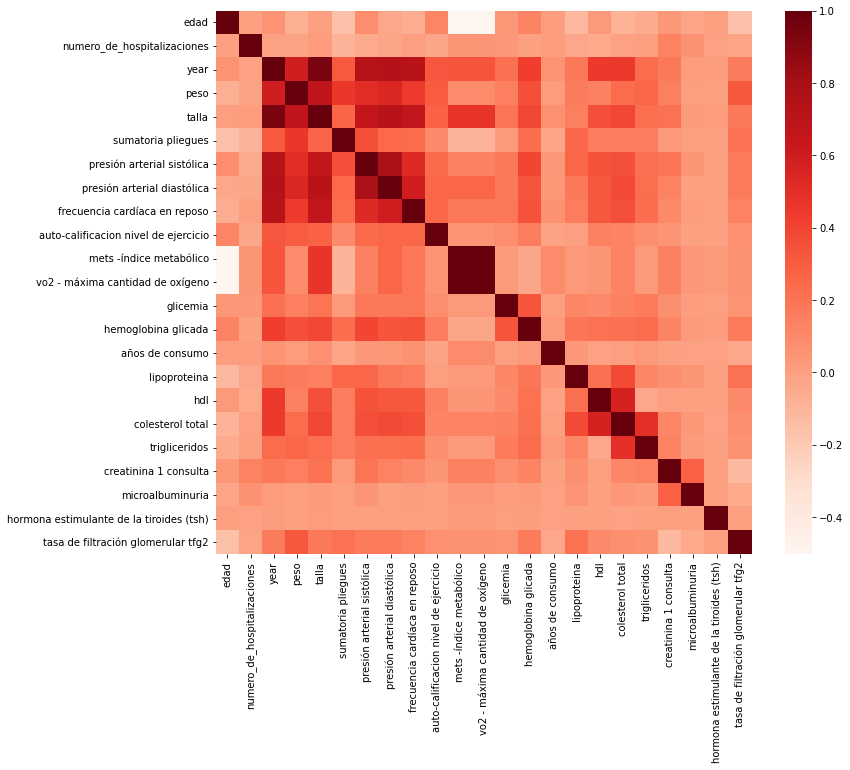

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(cor_relevante_features, annot=False, cmap=plt.cm.Reds)
plt.show()

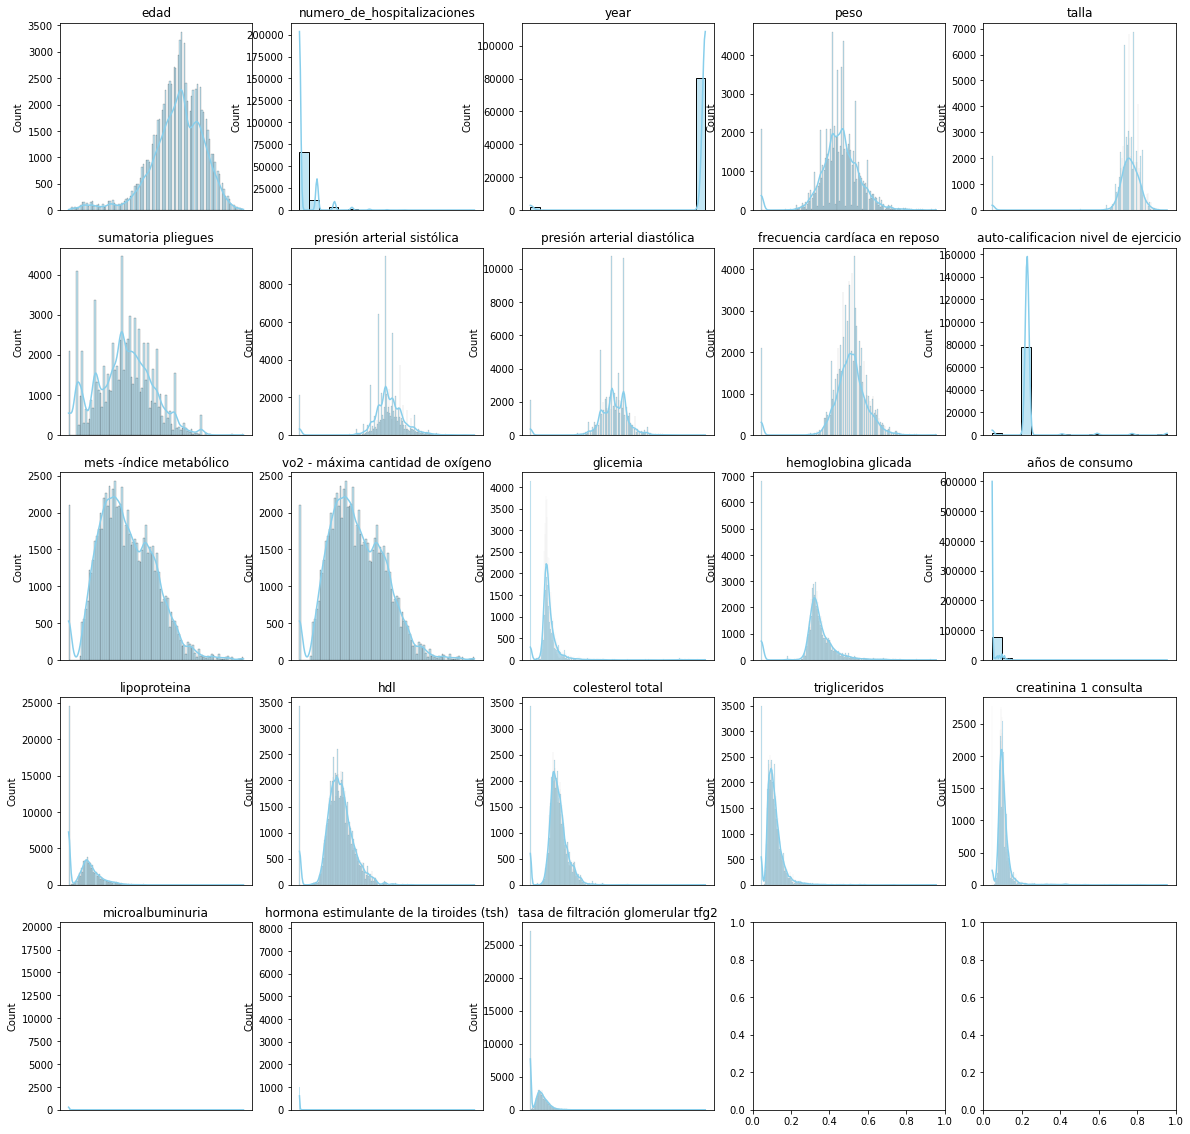

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(20, 20))

cols = list(union_all_factorized_features.columns)
count = len(union_all_factorized_features.columns)
c = 0 
for i in range(0,5):
  for j in range(0,5):
    if c < count: 
      #axs[i, j].plot(list(union_all_factorized_features[cols[c]].values) , list(union_all_factorized_features['numero_de_hospitalizaciones'].values) )
      sns.histplot(data=union_all_factorized_features, x=cols[c], kde=True, color="skyblue", ax=axs[i, j]).set(title=cols[c]) 
      axs[i, j].get_xaxis().set_visible(False)
      c = c + 1
plt.show()

ANÁLISIS EXPLORATORIO

In [ ]:
union_all_factorized_features.columns

Index(['edad', 'numero_de_hospitalizaciones', 'year', 'peso', 'talla',
       'sumatoria pliegues', 'presión arterial sistólica',
       'presión arterial diastólica', 'frecuencia cardíaca en reposo',
       'auto-calificacion nivel de ejercicio', 'mets -índice metabólico',
       'vo2 - máxima cantidad de oxígeno', 'glicemia', 'hemoglobina glicada',
       'años de consumo', 'lipoproteina', 'hdl', 'colesterol total',
       'trigliceridos', 'creatinina 1 consulta', 'microalbuminuria',
       'hormona estimulante de la tiroides (tsh)',
       'tasa de filtración glomerular tfg2'],
      dtype='object')

In [ ]:
union_all_factorized_features.dtypes

edad                                          Int64
numero_de_hospitalizaciones                   Int64
year                                          Int64
peso                                        Float64
talla                                         Int64
sumatoria pliegues                          Float64
presión arterial sistólica                    Int64
presión arterial diastólica                   Int64
frecuencia cardíaca en reposo                 Int64
auto-calificacion nivel de ejercicio          Int64
mets -índice metabólico                     Float64
vo2 - máxima cantidad de oxígeno            Float64
glicemia                                      Int64
hemoglobina glicada                         Float64
años de consumo                               Int64
lipoproteina                                Float64
hdl                                         Float64
colesterol total                            Float64
trigliceridos                               Float64
creatinina 1

In [ ]:
 #Paquetes
import plotly.express as  px
import numpy as np
import datetime

Número de hospitaizaciones por edad

In [ ]:
G1= union_all_factorized_features.groupby(['edad'], sort=True)[['numero_de_hospitalizaciones']].count().reset_index()
G1_1= G1.rename(columns={'numero_de_hospitalizaciones':'Frecuencia'})

In [ ]:
#Gráfico
fig  =  px . bar ( G1_1,  x = 'edad' ,  y = 'Frecuencia', title='numero_de_hospitalizaciones por edad') 
fig.update_layout(
    title_x = 0.5)
fig . show ()

Número de hospitalizaciones presión arterial diastólica

In [ ]:
G2= union_all_factorized_features.groupby(['presión arterial diastólica'], sort=True)[['numero_de_hospitalizaciones']].count().reset_index()
G2_2= G2.rename(columns={'numero_de_hospitalizaciones':'Frecuencia'})

In [ ]:
#Gráfico
fig  =  px . bar ( G2_2,  x = 'presión arterial diastólica' ,  y = 'Frecuencia', title='presión arterial diastólica') 
fig.update_layout(
    title_x = 0.5)
fig . show ()

In [ ]:
G3= union_all_factorized_features.groupby(['auto-calificacion nivel de ejercicio'], sort=True)[['numero_de_hospitalizaciones']].count().reset_index()
G3_3= G3.rename(columns={'numero_de_hospitalizaciones':'Frecuencia'})

In [ ]:
#Gráfico
fig  =  px . bar ( G3_3,  x = 'auto-calificacion nivel de ejercicio' ,  y = 'Frecuencia', title='Autocalificación de nivel de ejercicio de las personas hospitalizadas') 
fig.update_layout(
    title_x = 0.5)
fig . show ()

SELECCIÓN DE FEATURES

In [ ]:
union_all.nunique()

nrodoc                                       5480
sexo                                            2
edad                                           89
ciclo_vital                                     3
numero_de_hospitalizaciones                     9
eps validada                                    5
servicio admite                                 8
tipo egreso                                     5
dx relacionado3                               287
causa basica muerte                            71
profesional especialidad grd                   29
year                                            3
mes                                            13
peso                                          231
talla                                          66
clasificación imc                               5
sumatoria pliegues                            148
presión arterial sistólica                    136
presión arterial diastólica                    85
frecuencia cardíaca en reposo                  89


In [ ]:
import sklearn.feature_selection as sf

#y = list(union_all_factorized_features['numero_de_hospitalizaciones'].values)
#x = list(union_all_factorized_features.drop(['numero_de_hospitalizaciones'],axis=1).values)
union_all.drop(['diagnóstico principal','dx relacionado3','causa basica muerte','profesional especialidad grd','mes'], axis=1, inplace = True)
union_all_pd = pd.get_dummies(union_all, columns=union_all_string_columns, drop_first = True)
x = union_all_pd.drop(['nrodoc','numero_de_hospitalizaciones'], axis=1)
y = union_all_pd['numero_de_hospitalizaciones'].astype('int')

In [ ]:
union_all.columns

Index(['nrodoc', 'sexo', 'edad', 'ciclo_vital', 'numero_de_hospitalizaciones',
       'eps validada', 'servicio admite', 'tipo egreso', 'year', 'peso',
       'talla', 'clasificación imc', 'sumatoria pliegues',
       'presión arterial sistólica', 'presión arterial diastólica',
       'frecuencia cardíaca en reposo', 'auto-calificacion nivel de ejercicio',
       'mets -índice metabólico', 'vo2 - máxima cantidad de oxígeno',
       'calificación (índice de fragilidad)', 'calificación (apoyo monopodal)',
       'calificación velocidad', 'diabetes mellitus', 'glicemia',
       'hemoglobina glicada', 'control diabetes', 'tiene hta', 'control hta',
       'tiene epoc', 'enfermedad coronaria (en el último año)',
       'insuficiencia cardíaca', 'valvulopatía',
       'arritmia o paciente con dispositivo',
       'sufre de alguna enfermedad cardiovascular', 'tabaquismo',
       'años de consumo', 'lipoproteina', 'hdl', 'colesterol total',
       'trigliceridos', 'clasificación de framinghan'

**Evaluacion del desempeño**

In [ ]:
#Separar conjuntos de entrenamiento y prueba
import sklearn.model_selection as skm
p= 0.33
semilla = 6

In [ ]:
#Kfold validation
model2 = sl.LinearRegression()
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
test= skm.cross_val_score(model2,x,y,cv=kfold)

test.mean()


0.700541564928278

**Métricas de precisión**

In [ ]:
# Mean Absolute Error
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'neg_mean_absolute_error'
model5 = sl.LinearRegression()
resultado_mae = skm.cross_val_score(model5,x,y,cv=kfold,scoring=score)


In [ ]:
# Mean Squared Error
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'neg_mean_squared_error'
model6 = sl.LinearRegression()
resultado_mse = skm.cross_val_score(model6,x,y,cv=kfold,scoring=score)


In [ ]:
# R2
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'r2'
model6 = sl.LinearRegression()
resultado = skm.cross_val_score(model6,x,y,cv=kfold,scoring=score)
print("R2: ",resultado.mean())
print("MAE: ",resultado_mae.mean()*-1)
print("MSE: ",resultado_mse.mean()*-1)

R2:  0.700541564928278
MAE:  0.15074114254270693
MSE:  0.14373659667157074


**Seleccion de modelos Lasso - Elastic Net - red neuronal**

Lasso

In [ ]:
#Evaluacion de desempeño

#Separar conjuntos de entrenamiento y prueba
import sklearn.model_selection as skm
p= 0.33
semilla = 6

Xentrena, Xprueba, Yentrena, Yprueba = skm.train_test_split(x,y,test_size=p, random_state=semilla)

#Crear modelo
model = sl.Lasso()

#Entrenamiento de modelo
model.fit(Xentrena, Yentrena)

#Pruebas del modelo

model.score(Xprueba, Yprueba)

0.010388693770769897

In [ ]:
#Kfold validation
model2 = sl.Lasso()
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
test= skm.cross_val_score(model2,x,y,cv=kfold)

In [ ]:
#Repeated Random Test-Train Splits
kfold = skm.ShuffleSplit(n_splits=10, test_size=p, random_state=semilla)
model4 = sl.Lasso()
test = skm.cross_val_score(model4, x,y,cv=kfold)

test.mean()

0.011044804240067796

In [ ]:
#Metricas de precision

# Mean Absolute Error
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'neg_mean_absolute_error'
model5 = sl.Lasso()
resultado = skm.cross_val_score(model5,x,y,cv=kfold,scoring=score)
print("MAE: ",resultado.mean()*-1)

# Mean Squared Error
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'neg_mean_squared_error'
model6 = sl.Lasso()
resultado = skm.cross_val_score(model6,x,y,cv=kfold,scoring=score)
print("MSE: ",resultado.mean()*-1)

# R2
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'r2'
model6 = sl.Lasso()
resultado = skm.cross_val_score(model6,x,y,cv=kfold,scoring=score)
print("R2: ",resultado.mean()*100)

MAE:  0.4537523443485788
MSE:  0.47413119565286943
R2:  1.1017818231962795


**ElasticNet**

In [ ]:
#Separar conjuntos de entrenamiento y prueba
import sklearn.model_selection as skm
p= 0.33
semilla = 6

Xentrena, Xprueba, Yentrena, Yprueba = skm.train_test_split(x,y,test_size=p, random_state=semilla)

#Crear modelo
model = sl.ElasticNet()

#Entrenamiento de modelo
model.fit(Xentrena, Yentrena)

#Pruebas del modelo

model.score(Xprueba, Yprueba)

0.01255935256038443

In [ ]:
#Kfold validation
model2 = sl.ElasticNet()
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
test= skm.cross_val_score(model2,x,y,cv=kfold)

test.mean()

0.013800643263666302

In [ ]:
#Repeated Random Test-Train Splits
kfold = skm.ShuffleSplit(n_splits=10, test_size=p, random_state=semilla)
model4 = sl.ElasticNet()
test = skm.cross_val_score(model4, x,y,cv=kfold)

test.mean()

0.013947067984460538

In [ ]:
#Metricas de precision

# Mean Absolute Error
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'neg_mean_absolute_error'
model5 = sl.ElasticNet()
resultado = skm.cross_val_score(model5,x,y,cv=kfold,scoring=score)
print("MAE: ",resultado.mean()*-1)

# Mean Squared Error
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'neg_mean_squared_error'
model6 = sl.ElasticNet()
resultado = skm.cross_val_score(model6,x,y,cv=kfold,scoring=score)
print("MSE: ",resultado.mean()*-1)

# R2
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'r2'
model6 = sl.ElasticNet()
resultado = skm.cross_val_score(model6,x,y,cv=kfold,scoring=score)
print("R2: ",resultado.mean()*100)

MAE:  0.4520063043168186
MSE:  0.47279489729522306
R2:  1.3800643263666301


Red Neuroanl

In [ ]:
#Separar conjuntos de entrenamiento y prueba

#Separar conjuntos de entrenamiento y prueba
import sklearn.model_selection as skm
p= 0.33
semilla = 6

Xentrena, Xprueba, Yentrena, Yprueba = skm.train_test_split(x,y,test_size=p, random_state=semilla)

#Crear modelo

model = MLPRegressor(activation="logistic", solver='sgd', random_state=1, max_iter=500)

#Entrenamiento de modelo
model.fit(Xentrena, Yentrena)

#Pruebas del modelo

model.score(Xprueba, Yprueba)


0.0045983485772853605

In [ ]:
#Kfold validation
model2 = MLPRegressor(activation="logistic", solver='sgd', random_state=1, max_iter=2000)
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
test= skm.cross_val_score(model2,x,y,cv=kfold)


In [ ]:
#Repeated Random Test-Train Splits
kfold = skm.ShuffleSplit(n_splits=10, test_size=p, random_state=semilla)
model4 = MLPRegressor(activation="logistic", solver='sgd', random_state=1, max_iter=2000)
test = skm.cross_val_score(model4, x,y,cv=kfold)

test.mean()

0.004498096813585761

In [ ]:
#Metricas de precisión

# Mean Absolute Error
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'neg_mean_absolute_error'
model5 = MLPRegressor(activation="logistic", solver='sgd', random_state=1, max_iter=2000)
resultado = skm.cross_val_score(model5,x,y,cv=kfold,scoring=score)
print("MAE: ",resultado.mean()*-1)

# Mean Squared Error
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'neg_mean_squared_error'
model6 = MLPRegressor(activation="logistic", solver='sgd', random_state=1, max_iter=2000)
resultado = skm.cross_val_score(model6,x,y,cv=kfold,scoring=score)
print("MSE: ",resultado.mean()*-1)

# R2
kfold = skm.KFold(n_splits=10, random_state=7, shuffle=True)
score = 'r2'
model6 = MLPRegressor(activation="logistic", solver='sgd', random_state=1, max_iter=2000)
resultado = skm.cross_val_score(model6,x,y,cv=kfold,scoring=score)
print("R2: ",resultado.mean()*100)

MAE:  0.4507791985079283
MSE:  0.47601827515987594


In [ ]:
##LOGISTIC REGRESSION

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l2')
logit.fit(X_train, y_train)

logit_pred = logit.predict(X_test)
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred,average='weighted')))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred,average='weighted')))